In [2]:
#task 1a 

import numpy as np
import matplotlib.pyplot as plt


T = 1.0      
N = 100     
dt = T / N   
np.random.seed(20)

# brownian motion
dW = np.sqrt(dt) * np.random.randn(N)  
W = np.cumsum(dW)                      


def f(W):
    return np.sin(W)  

def df(W):
    return np.cos(W)  

#Ito integral using left point rule
Ito_integral = np.sum(f(W[:-1]) * dW)

#Stratonovich integral using midpoint rule
W_mid = (W[:-1] + W[1:]) / 2  # Midpoints
Stratonovich_integral = np.sum(f(W_mid) * dW)

 
Correction_term = 0.5 * np.sum(df(W[:-1]) * dt)


print(f"Itô Integral: {Ito_integral:.5f}")
print(f"Stratonovich Integral: {Stratonovich_integral:.5f}")
print(f"Correction Term: {Correction_term:.5f}")
print(f"Stratonovich = Itô + Correction: {Ito_integral + Correction_term:.5f}")


plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, T, N), W, label="Wiener Process W(t)", color="blue")
plt.xlabel("Time t")
plt.ylabel("W(t)")
plt.title("Wiener Process Simulation")
plt.legend()
plt.grid() 
plt.savefig("Wiener Process")
plt.show()


ValueError: operands could not be broadcast together with shapes (999,) (1000,) 

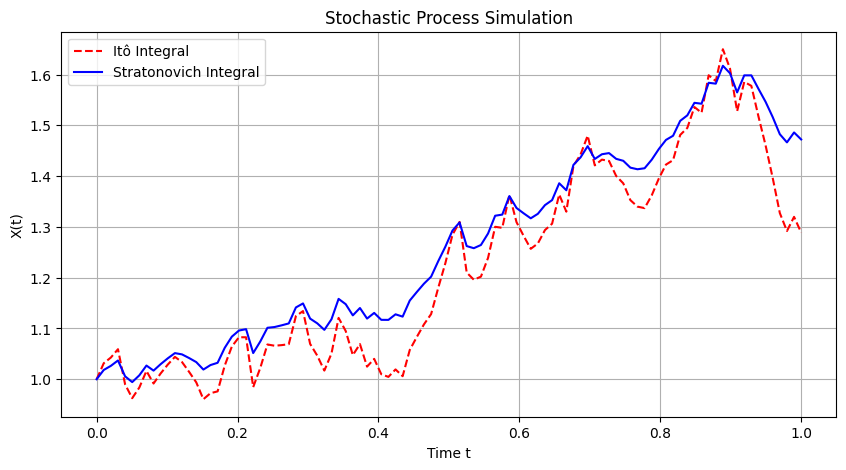

In [3]:
#task1b
import numpy as np
import matplotlib.pyplot as plt


T = 1.0        
N = 100       
dt = T / N     
mu = 0.5       
sigma = 0.3    
np.random.seed(20)

#Brownian motion
dW = np.sqrt(dt) * np.random.randn(N)  
W = np.cumsum(dW)                      

#initialize X 
X_ito = np.zeros(N)
X_strat = np.zeros(N)
X_ito[0] = X_strat[0] = 1  

# Euler-Maruyama method
for i in range(N - 1):
    X_ito[i + 1] = X_ito[i] + mu * X_ito[i] * dt + sigma * X_ito[i] * dW[i]

# Stratonovich integration using midpoint method
for i in range(N - 1):
    W_mid = W[i] + dW[i] / 2  #midpoint approximation
    X_strat[i + 1] = X_strat[i] + mu * X_strat[i] * dt + sigma * X_strat[i] * (W_mid - W[i])


time = np.linspace(0, T, N)


plt.figure(figsize=(10, 5))
plt.plot(time, X_ito, label="Itô Integral", linestyle='dashed', color='red')
plt.plot(time, X_strat, label="Stratonovich Integral", linestyle='solid', color='blue')
plt.xlabel("Time t")
plt.ylabel("X(t)")
plt.title("Stochastic Process Simulation")
plt.legend()
plt.grid() 
plt.savefig("stochastic Process")
plt.show()


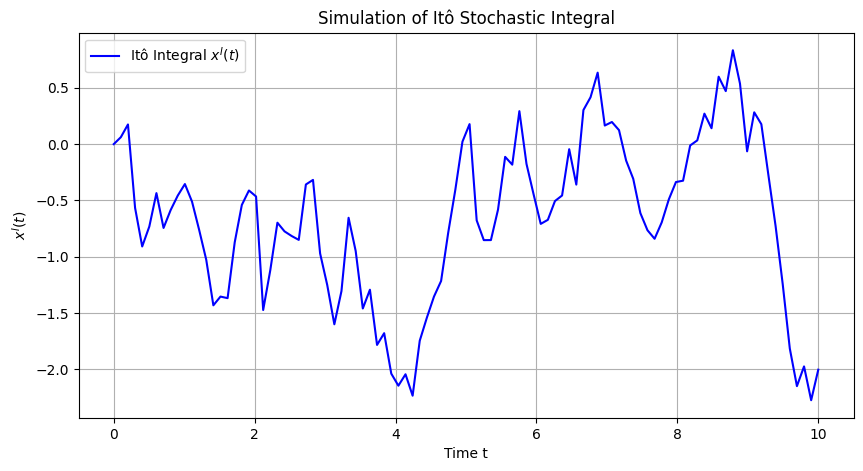

In [4]:
#task1c 

import numpy as np
import matplotlib.pyplot as plt


t_final = 10  
N = 100       
dt = t_final / N  
np.random.seed(20)


dW = np.sqrt(dt) * np.random.randn(N)  
W = np.cumsum(dW)                      


xI = np.zeros(N)
xI[0] = 0  # Initial condition

#Ito integral 
for i in range(1, N):
    xI[i] = xI[i - 1] + dW[i]  #summation of brownian increments


time = np.linspace(0, t_final, N)


plt.figure(figsize=(10, 5))
plt.plot(time, xI, label=r'Itô Integral $x^I(t)$', color='blue')
plt.xlabel("Time t")
plt.ylabel(r"$x^I(t)$")
plt.title("Simulation of Itô Stochastic Integral")
plt.legend()
plt.grid()
plt.savefig("ito_integral_simulation.png", dpi=300)
plt.show()


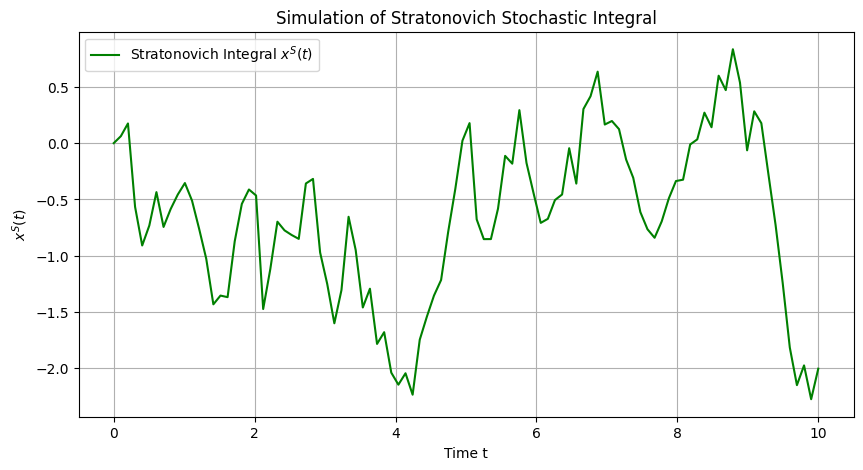

In [5]:
#task1d
import numpy as np
import matplotlib.pyplot as plt


t_final = 10  
N = 100       
dt = t_final / N  
np.random.seed(20)


dW = np.sqrt(dt) * np.random.randn(N)  
W = np.cumsum(dW)                      

#initialize x^S(t) 
xS = np.zeros(N)
xS[0] = 0  

#Stratonovich integral using midpoint method
for i in range(1, N):
    W_mid = W[i-1] + 0.5 * dW[i]  
    xS[i] = xS[i-1] + dW[i]  


time = np.linspace(0, t_final, N)


plt.figure(figsize=(10, 5))
plt.plot(time, xS, label=r'Stratonovich Integral $x^S(t)$', color='green')
plt.xlabel("Time t")
plt.ylabel(r"$x^S(t)$")
plt.title("Simulation of Stratonovich Stochastic Integral")
plt.legend()
plt.grid()
plt.savefig("stratonovich_integral_simulation.png", dpi=300)
plt.show()


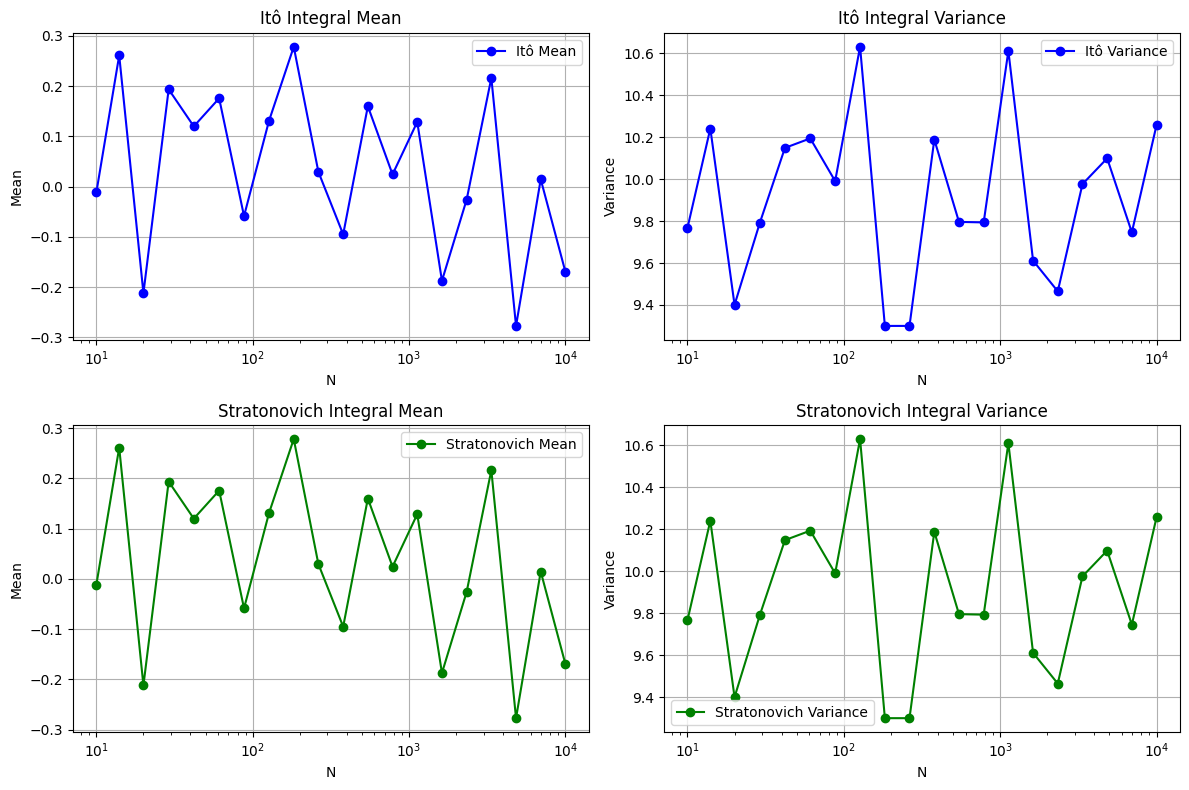

In [6]:
#task1e 

import numpy as np
import matplotlib.pyplot as plt


t_final = 10  
Ns = np.logspace(1, 4, num=20, dtype=int)  
num_simulations = 500  
np.random.seed(20)

#stores statistics
ito_means, ito_vars = [], []
strat_means, strat_vars = [], []

#loop over different N values
for N in Ns:
    dt = t_final / N  

    ito_end_values = []
    strat_end_values = []

    #simulates multiple trajectories
    for _ in range(num_simulations):
        dW = np.sqrt(dt) * np.random.randn(N)  
        W = np.cumsum(dW)  

        #Ito integral (left-point rule)
        xI = np.cumsum(dW)

        #Stratonovich integral (midpoint rule)
        W_mid = np.hstack(([0], 0.5 * (W[:-1] + W[1:])))  
        xS = np.cumsum(dW)  # Since dX^I_t = dW_t, this simplifies

        #stores the final values at t = 10
        ito_end_values.append(xI[-1])
        strat_end_values.append(xS[-1])

    #compute mean and variance 
    ito_means.append(np.mean(ito_end_values))
    ito_vars.append(np.var(ito_end_values))
    strat_means.append(np.mean(strat_end_values))
    strat_vars.append(np.var(strat_end_values))


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

#Ito mean
axes[0, 0].plot(Ns, ito_means, 'bo-', label="Itô Mean")
axes[0, 0].set_xscale("log")
axes[0, 0].set_xlabel("N")
axes[0, 0].set_ylabel("Mean")
axes[0, 0].set_title("Itô Integral Mean")
axes[0, 0].grid()
axes[0, 0].legend()

#Ito variance
axes[0, 1].plot(Ns, ito_vars, 'bo-', label="Itô Variance")
axes[0, 1].set_xscale("log")
axes[0, 1].set_xlabel("N")
axes[0, 1].set_ylabel("Variance")
axes[0, 1].set_title("Itô Integral Variance")
axes[0, 1].grid()
axes[0, 1].legend()

#Stratonovich mean
axes[1, 0].plot(Ns, strat_means, 'go-', label="Stratonovich Mean")
axes[1, 0].set_xscale("log")
axes[1, 0].set_xlabel("N")
axes[1, 0].set_ylabel("Mean")
axes[1, 0].set_title("Stratonovich Integral Mean")
axes[1, 0].grid()
axes[1, 0].legend()

#Stratonovich variance
axes[1, 1].plot(Ns, strat_vars, 'go-', label="Stratonovich Variance")
axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("N")
axes[1, 1].set_ylabel("Variance")
axes[1, 1].set_title("Stratonovich Integral Variance")
axes[1, 1].grid()
axes[1, 1].legend()

plt.tight_layout()

plt.savefig("stochastic_integral_statistics.png", dpi=300)
plt.show()


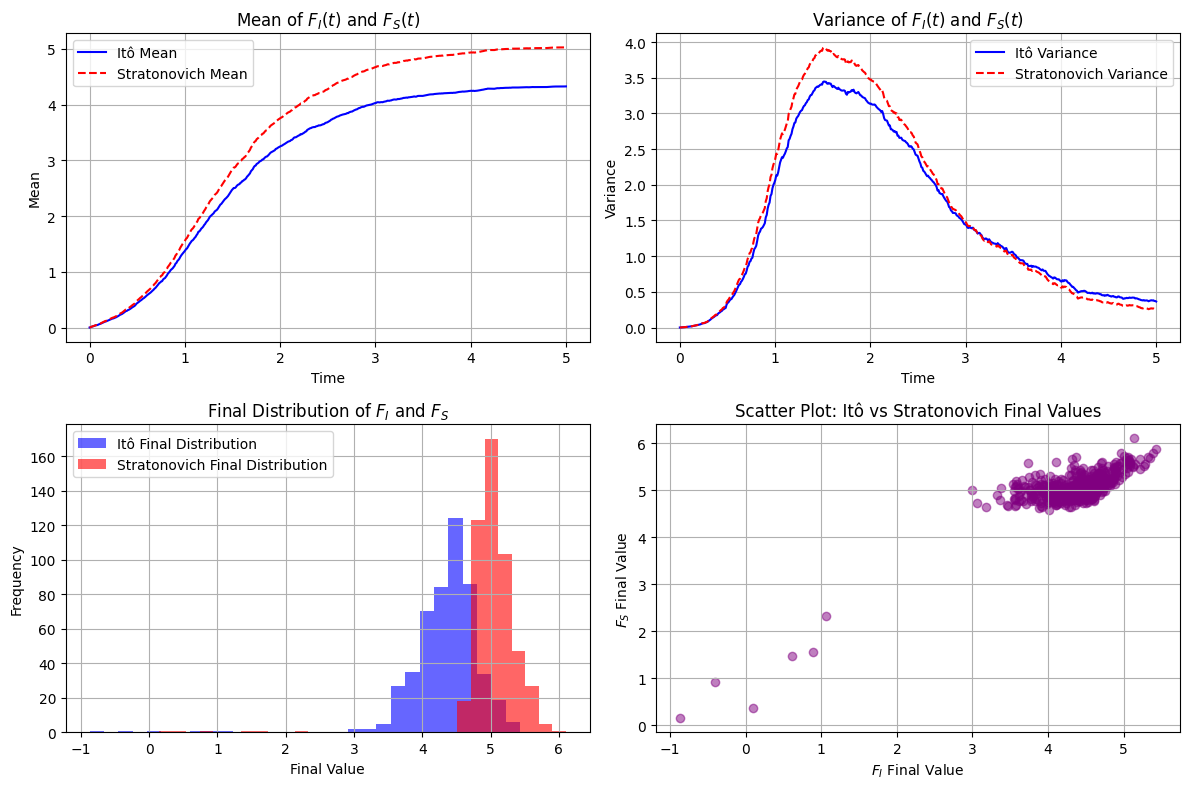

In [7]:
#task1f 

import numpy as np
import matplotlib.pyplot as plt


t_final = 5.0       
dt = 0.01           
N = int(t_final / dt)  
mu = 0.5            
sigma = 0.3         
X0 = 1.0            
X_stop = 2.5        
num_paths = 500     

np.random.seed(20)

#store results
F_I_all = np.zeros((num_paths, N))
F_S_all = np.zeros((num_paths, N))


for j in range(num_paths):
    X = np.zeros(N)
    X[0] = X0
    F_I = np.zeros(N)
    F_S = np.zeros(N)

    for i in range(1, N):
        dW = np.sqrt(dt) * np.random.randn()  

        #update X_t using stochastic process
        X[i] = X[i-1] + mu * X[i-1] * dt + sigma * X[i-1] * dW

        #Ito and Stratonovich integrals
        F_I[i] = F_I[i-1] + X[i-1]**2 * (mu * X[i-1] * dt + sigma * X[i-1] * dW)
        F_S[i] = F_S[i-1] + X[i-1]**2 * (mu * X[i-1] * dt + sigma * X[i-1] * (dW + 0.5 * sigma * X[i-1] * dt))

        #stops if X crosses threshold
        if X[i] >= X_stop:
            F_I[i:] = F_I[i]
            F_S[i:] = F_S[i]
            break

    
    F_I_all[j, :] = F_I
    F_S_all[j, :] = F_S


F_I_mean = np.mean(F_I_all, axis=0)
F_S_mean = np.mean(F_S_all, axis=0)
F_I_var = np.var(F_I_all, axis=0)
F_S_var = np.var(F_S_all, axis=0)
time = np.linspace(0, t_final, N)


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(time, F_I_mean, label="Itô Mean", color="blue")
axes[0, 0].plot(time, F_S_mean, label="Stratonovich Mean", color="red", linestyle="dashed")
axes[0, 0].set_title("Mean of $F_I(t)$ and $F_S(t)$")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Mean")
axes[0, 0].legend()
axes[0, 0].grid()

axes[0, 1].plot(time, F_I_var, label="Itô Variance", color="blue")
axes[0, 1].plot(time, F_S_var, label="Stratonovich Variance", color="red", linestyle="dashed")
axes[0, 1].set_title("Variance of $F_I(t)$ and $F_S(t)$")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Variance")
axes[0, 1].legend()
axes[0, 1].grid()

axes[1, 0].hist(F_I_all[:, -1], bins=30, alpha=0.6, color="blue", label="Itô Final Distribution")
axes[1, 0].hist(F_S_all[:, -1], bins=30, alpha=0.6, color="red", label="Stratonovich Final Distribution")
axes[1, 0].set_title("Final Distribution of $F_I$ and $F_S$")
axes[1, 0].set_xlabel("Final Value")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].legend()
axes[1, 0].grid()

axes[1, 1].scatter(F_I_all[:, -1], F_S_all[:, -1], alpha=0.5, color="purple")
axes[1, 1].set_title("Scatter Plot: Itô vs Stratonovich Final Values")
axes[1, 1].set_xlabel("$F_I$ Final Value")
axes[1, 1].set_ylabel("$F_S$ Final Value")
axes[1, 1].grid()

plt.tight_layout()
plt.savefig("stochastic_integrals_comparison.png", dpi=300)
plt.show()


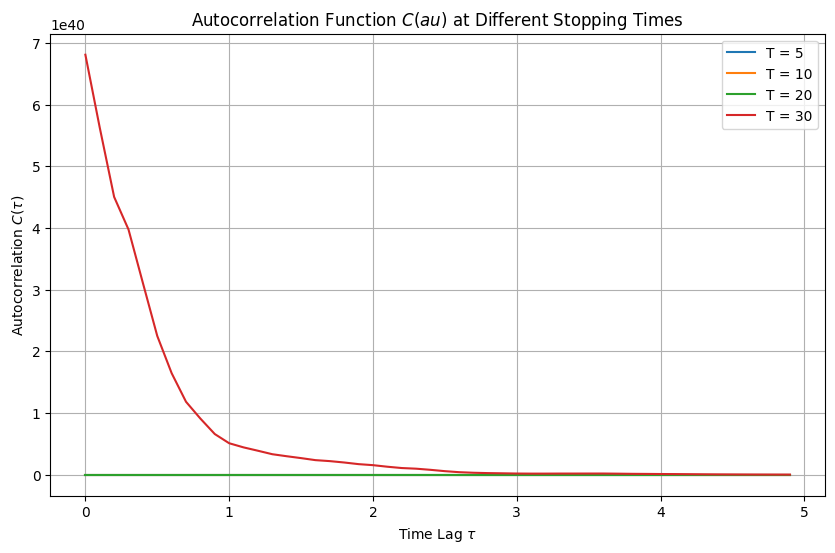

In [8]:
#task1g 

import numpy as np
import matplotlib.pyplot as plt


dt = 0.1          
T_list = [5, 10, 20, 30]  
num_paths = 500   
tau_max = 5       
num_lags = int(tau_max / dt)  

mu = 0.5          
sigma = 0.3       
X0 = 1.0          

np.random.seed(42)


def autocorrelation(F, dt, tau_max):
    N_t = len(F[0])  
    num_lags = int(tau_max / dt)
    C_tau = np.zeros(num_lags)

    for k in range(num_lags):
        tau = k * dt
        valid_indices = N_t - k  
        C_tau[k] = np.mean(F[:, :valid_indices] * F[:, k:valid_indices+k])  

    return C_tau


correlations = {}

for T in T_list:
    N_t = int(T / dt)  
    F_all = np.zeros((num_paths, N_t))  

    for j in range(num_paths):
        X = np.zeros(N_t)
        X[0] = X0
        F = np.zeros(N_t)

        for i in range(1, N_t):
            dW = np.sqrt(dt) * np.random.randn()  
            X[i] = X[i-1] + mu * X[i-1] * dt + sigma * X[i-1] * dW
            F[i] = F[i-1] + X[i-1]**2 * (mu * X[i-1] * dt + sigma * X[i-1] * dW)  
            
        F_all[j, :] = F

    
    C_tau = autocorrelation(F_all, dt, tau_max)
    correlations[T] = C_tau


time_lags = np.arange(0, tau_max, dt)

plt.figure(figsize=(10, 6))
for T in T_list:
    plt.plot(time_lags, correlations[T], label=f"T = {T}")

plt.xlabel(r"Time Lag $\tau$")
plt.ylabel(r"Autocorrelation $C(\tau)$")
plt.title("Autocorrelation Function $C(\tau)$ at Different Stopping Times")
plt.legend()
plt.grid()
plt.savefig("autocorrelation_function.png", dpi=300)
plt.show()


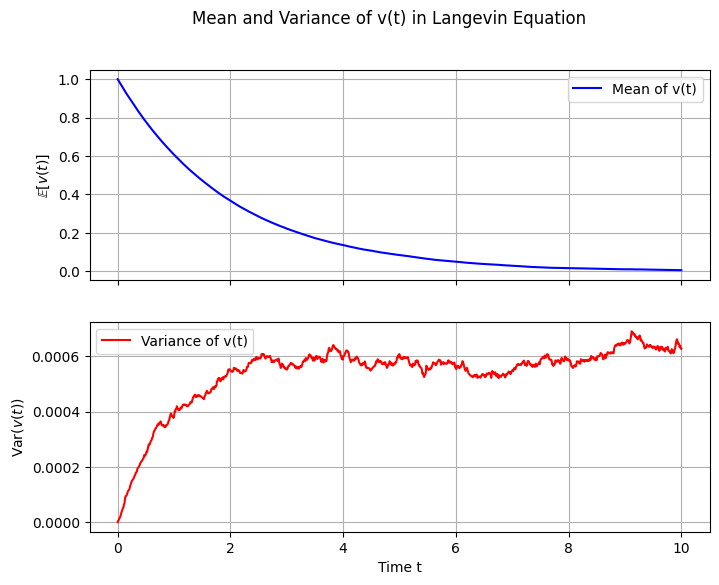

In [9]:
#task2 

import numpy as np
import matplotlib.pyplot as plt


gamma = 0.5   
D = 1.0       #diffusion coefficient
v0 = 1.0      
T = 10        
dt = 0.01     
N = int(T / dt)  
num_paths = 500  


t = np.linspace(0, T, N)

#Euler-Maruyama method
v_all = np.zeros((num_paths, N))
v_all[:, 0] = v0  

for j in range(num_paths):
    W = np.random.randn(N) * np.sqrt(dt) 
    X = np.cumsum(W**2) * dt  

    for i in range(1, N):
        eta = (X[i] - X[i-1]) / dt  
        dW = np.sqrt(dt) * np.random.randn()  
        v_all[j, i] = v_all[j, i-1] + (-gamma * v_all[j, i-1] * dt) + np.sqrt(2*D) * eta * dW


v_mean = np.mean(v_all, axis=0)
v_var = np.var(v_all, axis=0)


fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axs[0].plot(t, v_mean, label="Mean of v(t)", color="blue")
axs[0].set_ylabel(r"$\mathbb{E}[v(t)]$")
axs[0].legend()
axs[0].grid()

axs[1].plot(t, v_var, label="Variance of v(t)", color="red")
axs[1].set_xlabel("Time t")
axs[1].set_ylabel(r"Var$(v(t))$")
axs[1].legend()
axs[1].grid()

plt.suptitle("Mean and Variance of v(t) in Langevin Equation")
plt.savefig("langevin_mean_variance.png", dpi=300)
plt.show()
